<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/visualizacionPajarosEnSantander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import numpy as NumPy
import folium as Folium

import matplotlib.pyplot as PyPlot
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap,to_hex

Vamos a cargar el archivo con el dataset de los audios de los pájaros. Subí el archivo a un repositorio en GitHub de acceso público. 

In [ ]:
url_git = 'https://github.com/camilorey/datasets_reales/blob/main/dataset_audiosPajaros_santander_OspinaEtAl2020.xlsx?raw=true'
dataset = Pandas.read_excel(url_git)
dataset.head()

,IDRecord,Catalogue_Number,Sound_collection,Class,Order,Family,Genus,Scientific_names,Recordist,Initial_Da,Hour,Municipality,Locality,Latitude,Longitude,Minimum_El,Remarks,Region,Biotic_uni,URL
0,1,IAvH-CSA-725,Colección de Sonidos Ambientales del Instituto...,Aves,Piciformes,Ramphastidae,Aulacorhynchus,Aulacorhynchus prasinus,Mauricio Álvarez-Rebolledo,1994-10-31 00:00:00,NaN,Encino,"PNN Alto Guanentá, Reserva Cachalú",6.165,-73.1375,1460.0,,Andean,Guane-Yariguíes,http://colecciones.humboldt.org.co/rec/sonidos...
1,2,IAvH-CSA-729,Colección de Sonidos Ambientales del Instituto...,Aves,Galliformes,Odontophoridae,Odontophorus,Odontophorus strophium,Mauricio Álvarez-Rebolledo,1994-09-30 00:00:00,NaN,Encino,"PNN Alto Guanentá, Reserva Cachalú",6.165,-73.1375,1460.0,,Andean,Guane-Yariguíes,http://colecciones.humboldt.org.co/rec/sonidos...
2,3,IAvH-CSA-795,Colección de Sonidos Ambientales del Instituto...,Aves,Galliformes,Odontophoridae,Odontophorus,Odontophorus strophium,Mauricio Álvarez-Rebolledo,1994-09-30 00:00:00,NaN,Encino,"PNN Alto Guanentá, Reserva Cachalú",6.165,-73.1375,1460.0,,Andean,Guane-Yariguíes,http://colecciones.humboldt.org.co/rec/sonidos...
3,4,IAvH-CSA-806,Colección de Sonidos Ambientales del Instituto...,Aves,Nyctibiiformes,Nyctibiidae,Nyctibius,Nyctibius griseus,Mauricio Álvarez-Rebolledo,1994-09-30 00:00:00,NaN,Encino,"PNN Alto Guanentá, Reserva Cachalú",6.165,-73.1375,1460.0,,Andean,Guane-Yariguíes,http://colecciones.humboldt.org.co/rec/sonidos...
4,5,IAvH-CSA-809,Colección de Sonidos Ambientales del Instituto...,Aves,Nyctibiiformes,Nyctibiidae,Nyctibius,Nyctibius griseus,Mauricio Álvarez-Rebolledo,,NaN,Encino,"PNN Alto Guanentá, Reserva Cachalú",6.165,-73.1375,1460.0,,Andean,Guane-Yariguíes,http://colecciones.humboldt.org.co/rec/sonidos...


Las coordenadas de latitud y longitud de cada observación están en las columnas 
**Latitude** y **Longitude** del DataFrame. Sin embargo, todavía no sabemos qué información tenemos acerca de los pájaros. Vamos a sacar un resumen de qué tipo de pájaros tenemos ordenados por orden (**Order**), familia (**Family**), genus (**Genus**) y nombre científico (**Scientific_names**)

In [ ]:
var_color = 'Order'
dataset['Longitude'].describe()

count    1499.000000
mean      -73.543995
std         0.478066
min       -74.361000
25%       -74.131700
50%       -73.389200
75%       -73.221700
max       -72.692900
Name: Longitude, dtype: float64

In [ ]:
organizacion_pajaros = Pandas.pivot_table(dataset,index=[var_color,'Scientific_names'],values='IDRecord',aggfunc='count')
organizacion_pajaros

IDRecord
Order           Scientific_names                  
Accipitriformes Buteogallus meridionalis         1
                Rupornis magnirostris            9
                Spizaetus tyrannus               3
Anseriformes    Chauna chavaria                  9
                Dendrocygna autumnalis           2
...                                            ...
Trogoniformes   Trogon chionurus                19
                Trogon collaris                  9
                Trogon melanurus                 3
                Trogon personatus                2
                Trogon violaceus                 1

[366 rows x 1 columns]

Podemos usar un color para describir cada órden. Para esto, vamos a generar una paleta de colores que usaremos para describir cada órden de pájaros.

In [ ]:
nombres_colores = list(organizacion_pajaros.index.get_level_values(0).unique())
def crearPaleta(listaCategorias,nomPaleta):
  paleta_categorias = cm.get_cmap(nomPaleta, len(listaCategorias))
  #vamos a crear números para poder llamar la paleta
  linSpace = NumPy.linspace(0,1,len(listaCategorias))
  dict_color = {}
  i = 0
  for lugar in listaCategorias:
    colorCat = paleta_categorias(linSpace[i])
    dict_color[lugar] = to_hex(colorCat)
    i +=1
  return dict_color

colores_mapa = crearPaleta(nombres_colores,'viridis')

Vamos a tener que agregar al mapa que creemos los puntos donde encontremos pájaros y vamos a tener que colorear esos puntos dependiendo de la paleta de color que acabamos de crear. Así, debemos recorrer el DataFrame, creando un punto 

Ahora, podemos generar un mapa para observar las posiciones de los pájaros como puntos dentro de un mapa de Folium,

In [ ]:
#posición donde va a comenzar el mapa.
centroColombia = [7.12539, -73.1198]
#vamos a crear el mapa de Colombia
mapaColombia = Folium.Map(location=centroColombia,width='80%',height='80%',zoom_start=9)
#vamos a crear una capa en el mapa para poner los puntos con las observaciones de los pájaros
capa_pajaros = Folium.FeatureGroup('grabaciones_registradas')
#ahora ponemos la capa de puntos donde se muestran los pájaros
for idx,fila in dataset.iterrows():
    #para saber dónde poner el punto
    lat = float(fila['Latitude'])
    lon = float(fila['Longitude'])
    #La información que queremos mostrar en el mapa (cuando naveguemos sobre ella)
    orden = fila['Order']
    familia = fila['Family']
    genus = fila['Genus']
    nom_cientifico = fila['Scientific_names']
    fecha_avistamiento =str(fila['Initial_Da'])
    localidad = fila['Locality']
    municipio = fila['Municipality']
    var_de_color = fila[var_color]
    color_punto = colores_mapa[var_de_color]
    #vamos a poner algo de información en el punto para ver qué se observó ahí
    info = "<b><h3>"+nom_cientifico+"""</h3></b>
            <p>
            <b> Orden</b>:<i>"""+orden+"""</i><br>
            <b> Familia</b>:>"""+familia+"""<br>
            <b> Genus</b>:"""+genus+"""<br>
            </p>
            <p>
            <b>Fecha</b>:"""+fecha_avistamiento+"<br>"\
            """<b>Municipio</b>: """+municipio+"<br>"\
            """<b> localidad</b>: """+localidad+\
            "</p>"
    #pone el círculo en el mapa
    Folium.CircleMarker([lat,lon],
                  tooltip = info,
                  radius = 5,
                  weight=1.0,
                  fill=True,
                  color=color_punto).add_to(capa_pajaros)
#ahora ponemos la capa en el mapa
capa_pajaros.add_to(mapaColombia)
mapaColombia

# Algunos análisis con el dataset

Como tiene una información de fecha, podemos volver el Dataset una serie de tiempo. 

In [ ]:
dataset = dataset.set_index('Initial_Da')

Con esto podemos ver las variables numéricas (latitud, longitud y elevación) como series de tiempo:

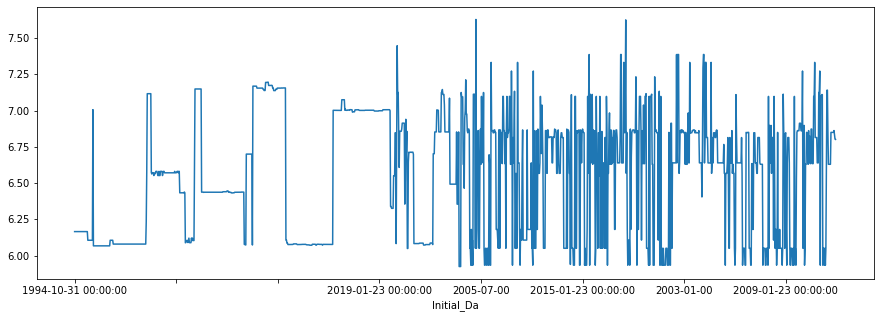

In [ ]:
dataset['Latitude'].plot(figsize=(15,5))

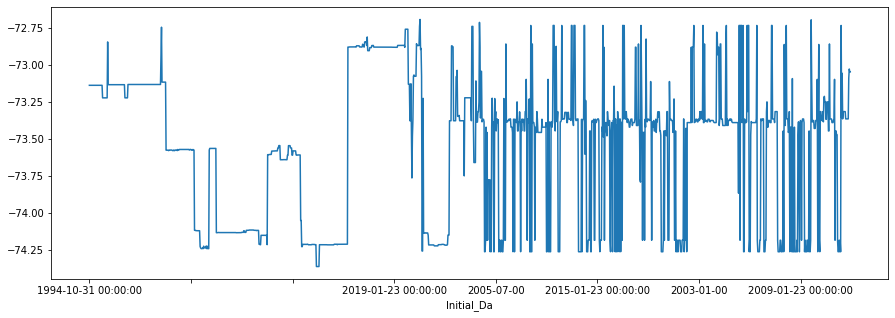

In [ ]:
dataset['Longitude'].plot(figsize=(15,5))

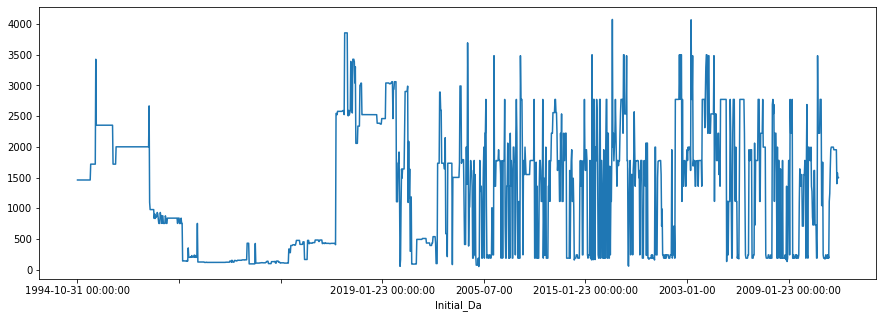

In [ ]:
dataset['Minimum_El'].plot(figsize=(15,5))

Ahora, podemos ver la distribución por órdenes (la variable de color)

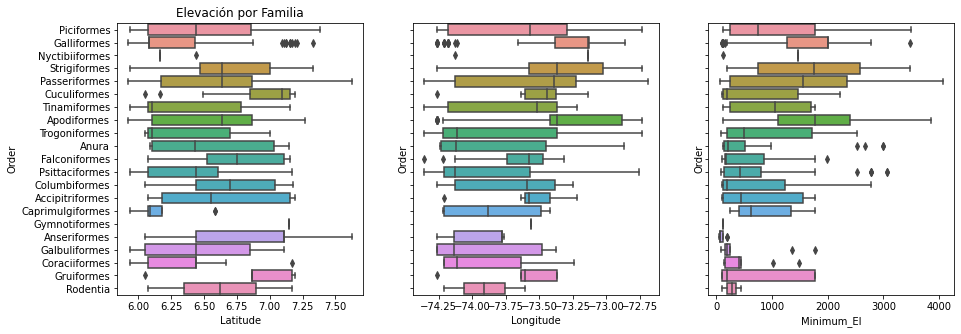

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,5),sharey=True)
subFiguras[0].set_title('Latitud por Familia')
subFiguras[0].set_title('Longitud por Familia')
subFiguras[0].set_title('Elevación por Familia')
SeaBorn.boxplot(data=dataset,x='Latitude',y='Order',ax=subFiguras[0])
SeaBorn.boxplot(data=dataset,x='Longitude',y='Order',ax=subFiguras[1])
SeaBorn.boxplot(data=dataset,x='Minimum_El',y='Order',ax=subFiguras[2])

Ahora podemos ver la distribución de Latitud y Longitud de una sola orden de pájaros. 

In [ ]:
ordenes = list(dataset['Order'].value_counts().keys())
for i in range(len(ordenes)):
  print(ordenes[i], "número: ",i)

Passeriformes número:  0
Galliformes número:  1
Apodiformes número:  2
Piciformes número:  3
Psittaciformes número:  4
Anura número:  5
Trogoniformes número:  6
Columbiformes número:  7
Strigiformes número:  8
Tinamiformes número:  9
Cuculiformes número:  10
Galbuliformes número:  11
Accipitriformes número:  12
Falconiformes número:  13
Anseriformes número:  14
Caprimulgiformes número:  15
Gymnotiformes número:  16
Coraciiformes número:  17
Nyctibiiformes número:  18
Gruiformes número:  19
Rodentia número:  20


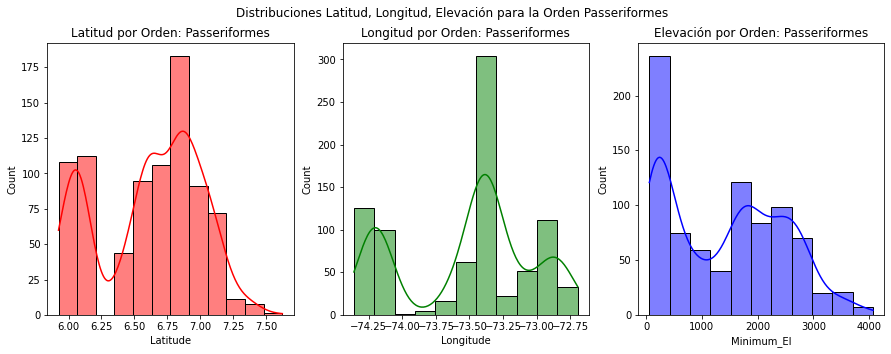

In [ ]:
nom_orden =ordenes[0] #escogemos qué orden queremos ver 
subdata = dataset.loc[dataset['Order']==nom_orden]
#figuras
Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,5))
Figura.suptitle('Distribuciones Latitud, Longitud, Elevación para la Orden '+nom_orden)
subFiguras[0].set_title('Latitud por Orden: '+nom_orden)
subFiguras[1].set_title('Longitud por Orden: '+nom_orden)
subFiguras[2].set_title('Elevación por Orden: '+nom_orden)
SeaBorn.histplot(subdata['Latitude'],ax=subFiguras[0],color='red',kde=True)
SeaBorn.histplot(subdata['Longitude'],ax=subFiguras[1],color='green',kde=True)
SeaBorn.histplot(subdata['Minimum_El'],ax=subFiguras[2],color='blue',kde=True)
PyPlot.show()

También podemos ver todos los datos usando un scatterplot por las variables numéricas. 

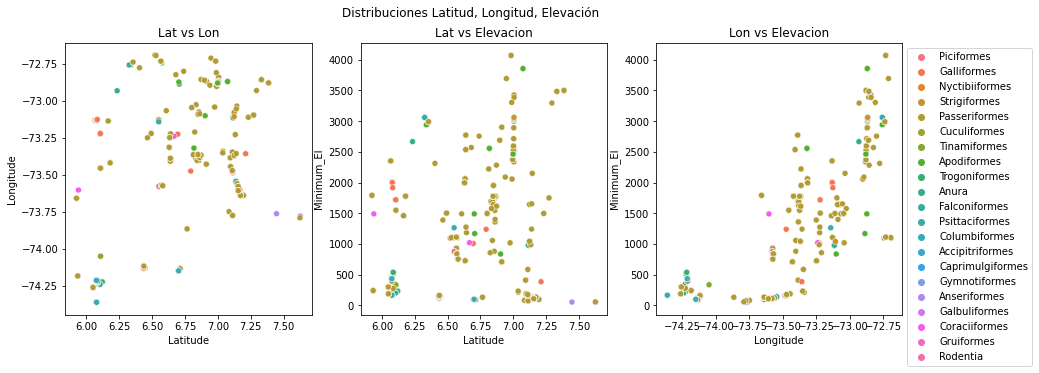

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,5))
Figura.suptitle('Distribuciones Latitud, Longitud, Elevación')
subFiguras[0].set_title('Lat vs Lon')
subFiguras[1].set_title('Lat vs Elevacion')
subFiguras[2].set_title('Lon vs Elevacion')
SeaBorn.scatterplot(data=dataset_analisis,x='Latitude',y='Longitude',hue='Order',ax=subFiguras[0],legend=False)
SeaBorn.scatterplot(data=dataset_analisis,x='Latitude',y='Minimum_El',hue='Order',ax=subFiguras[1],legend=False)
SeaBorn.scatterplot(data=dataset_analisis,x='Longitude',y='Minimum_El',hue='Order',ax=subFiguras[2]).legend(loc='upper left', 
                                                                                                            bbox_to_anchor=(1, 1), ncol=1)
PyPlot.show()